In [2]:
from classes_V3 import *

In [3]:
d = DC_IV('sample_4.1')

In [4]:
#d.draw_all_graphs()

In [5]:
d_2 = DC_IV('sample_4.1_2')

In [6]:
#d_2.draw_all_graphs()

[None, Text(0.5, 1.0, 'sample 4.1, H10-50')]

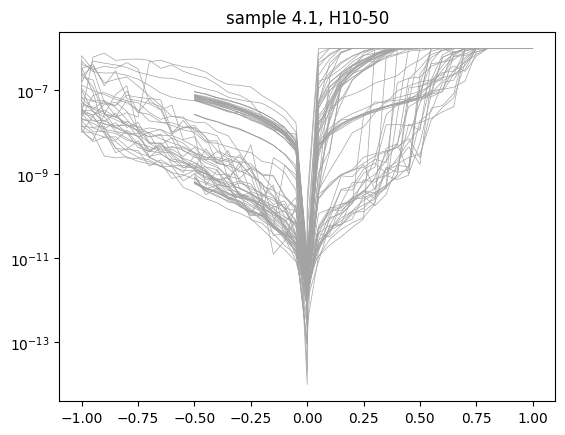

In [7]:
fig, ax = plt.subplots()
lines = d.draw_multiple_lines('H10-50', ax, color = '#a3a3a3', linewidth = 0.5)
ax.set(yscale='log', title='sample 4.1, H10-50')

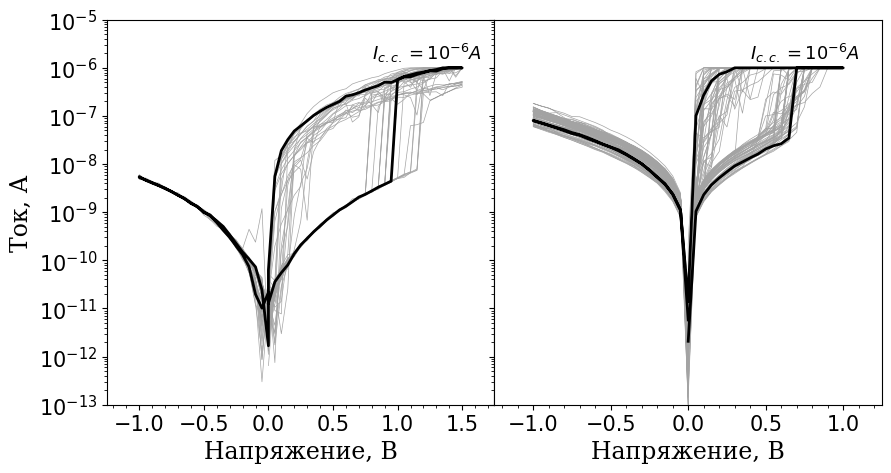

In [8]:
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(ncols=2, nrows=1, figure=fig)

ax_1 = fig.add_subplot(gs[0])
ax_2 = fig.add_subplot(gs[1])

d.draw_multiple_lines('H12-50', ax_1, measurs=[2,3,4,6,11], color = '#a3a3a3', linewidth = 0.5)
d.draw_multiple_lines('H12-75', ax_1, measurs=[i for i in range(1,21)], color = '#a4a4a4', linewidth = 0.5)
d.draw_single_line('H12-75', ax_1, 16, color = 'k', linewidth = 2)
ax_1.set(yscale='log', ylim=(10**(-13), 10**(-5)), xlim=[-1.25,1.75])
ax_1.tick_params(labelsize = 15)
ax_1.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax_1.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax_1.set_xlabel('Напряжение, В', size = 17, fontfamily = 'serif')
ax_1.set_ylabel('Ток, А', size = 17, fontfamily = 'serif')
ax_1.text(0.8, 1.5*10**-6, r'$I_{c.c.} = 10^{-6} A$', size = 13)


d.draw_multiple_lines('F16-75', ax_2, measurs=[i for i in range(1,52)], color = '#a3a3a3', linewidth = 0.5)
d.draw_single_line('F16-75', ax_2, 40, color = 'k', linewidth = 2)
ax_2.set(yscale='log', ylim=(10**(-13), 10**(-5)), xlim=[-1.25,1.25])
ax_2.tick_params(labelsize = 15, labelleft = False)
ax_2.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax_2.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax_2.set_xlabel('Напряжение, В', size = 17, fontfamily = 'serif')
ax_2.text(0.4, 1.5 * 10**-6, r'$I_{c.c.} = 10^{-6} A$', size = 13)

gs.update(wspace=0)

#plt.savefig('typical.png', dpi = 300, bbox_inches = 'tight')

In [24]:
xrd_data = pd.read_csv('HZO_XRD.dat', delimiter=' ')
peak_data = pd.read_csv('HZO_peak_fit.dat', delimiter=' ', skiprows=1, header=None)

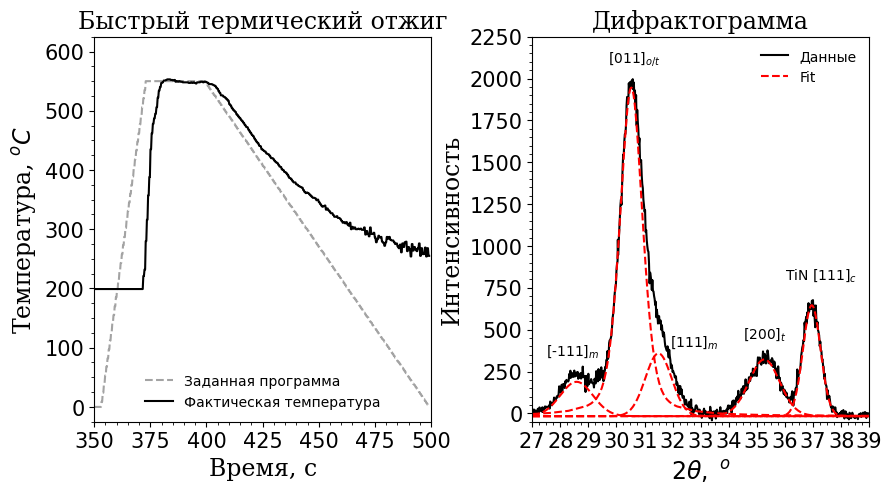

In [82]:
post_ann = pd.read_csv('post_ann.HIS', skiprows=7)

fig = plt.figure(figsize=(10, 5))
gs = GridSpec(ncols=2, nrows=1, figure=fig)

ax_1 = fig.add_subplot(gs[0])
ax_2 = fig.add_subplot(gs[1])

ax_1.plot(post_ann['Time'], post_ann['Setpoint'], linestyle = 'dashed', color = '#a3a3a3', label = 'Заданная программа')
ax_1.plot(post_ann['Time'], post_ann['Pyro'], color = 'k', label = 'Фактическая температура')
ax_1.set(xlim = [350,500], ylim=[-25, 625])
ax_1.legend(frameon = False)
ax_1.xaxis.set_major_locator(ticker.MultipleLocator(25))
ax_1.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax_1.yaxis.set_major_locator(ticker.MultipleLocator(100))
ax_1.yaxis.set_minor_locator(ticker.MultipleLocator(25))
ax_1.set_ylabel(r'Температура, $^oC$', size = 17, fontfamily = 'serif')
ax_1.set_xlabel('Время, с', size = 17, fontfamily = 'serif')
ax_1.set_title('Быстрый термический отжиг', size = 17, fontfamily = 'serif')
ax_1.tick_params(labelsize=15)

ax_2.plot(xrd_data['Baseline_X'], xrd_data['Subtracted_Data'], color = 'k', label = 'Данные')
ax_2.plot(peak_data[0], peak_data[1], color = 'r', linestyle = 'dashed', label = 'Fit')
ax_2.plot(peak_data[2], peak_data[3], color = 'r', linestyle = 'dashed')
ax_2.plot(peak_data[4], peak_data[5], color = 'r', linestyle = 'dashed')
ax_2.plot(peak_data[6], peak_data[7], color = 'r', linestyle = 'dashed')
ax_2.plot(peak_data[8], peak_data[9], color = 'r', linestyle = 'dashed')
ax_2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax_2.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax_2.yaxis.set_major_locator(ticker.MultipleLocator(250))
ax_2.yaxis.set_minor_locator(ticker.MultipleLocator(50))
ax_2.tick_params(labelsize=15)
ax_2.set_ylabel('Интенсивность', size = 17, fontfamily = 'serif')
ax_2.set_xlabel(r'$ 2\theta, \; ^o$', size = 17, fontfamily = 'serif')
ax_2.set_title('Дифрактограмма', size = 17, fontfamily = 'serif')
ax_2.set_xlim([27,39])
ax_2.set_ylim([-50,2250])
ax_2.legend(frameon = False)
ax_2.text(27.5, 350, r'[-111]$_m$')
ax_2.text(29.7, 2100, r'[011]$_{o/t}$')
ax_2.text(31.9, 400, r'[111]$_m$')
ax_2.text(34.5, 450, r'[200]$_t$')
ax_2.text(36, 800, r'TiN [111]$_c$')

gs.update(wspace=0.3)

#plt.savefig('annealing.png', dpi = 300, bbox_inches = 'tight')